In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [211]:
pip freeze > requirements.txt

Understanding DAtaset

In [190]:
data = pd.read_csv('/content/data.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [191]:
# Check null value and datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [192]:
data.describe()
# Min value for price, badrooms, and bathrooms are irrational

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


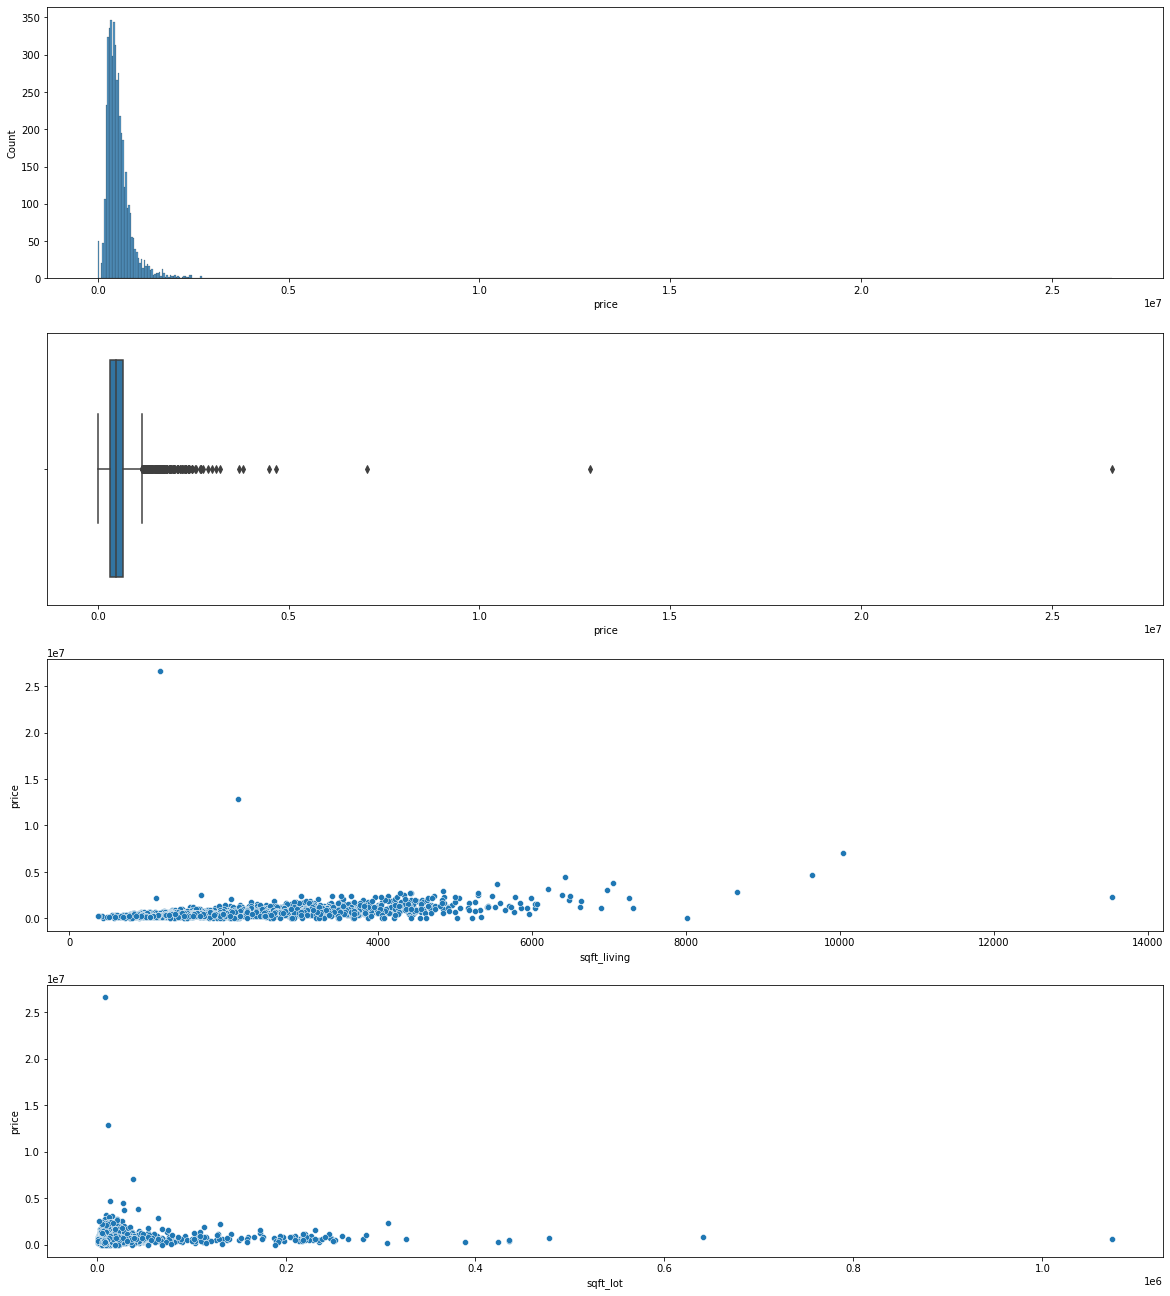

In [193]:
# Data spread by Price

f,ax = plt.subplots(4,1,figsize=(20,23))
sns.histplot(x = 'price',data=data, ax=ax[0])
sns.boxplot(x = 'price',data=data, ax=ax[1])
sns.scatterplot(x= 'sqft_living',y = 'price',data=data, ax=ax[2])
sns.scatterplot(x= 'sqft_lot',y = 'price',data=data, ax=ax[3])

Data Cleaning

In [194]:
# Round value of bedrooms, bathrooms and price
data['bedrooms'] = data['bedrooms'].round().astype(int)
data['bathrooms'] = data['bathrooms'].round().astype(int)
data['price'] = data['price'].round(decimals=2)
# Change statezip data type to int
data['statezip'] = data['statezip'].replace("WA 9", "9",regex=True).astype(int)

In [195]:
# Houses where price is 0
data.loc[(data['price'] == 0)].head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05 00:00:00,0.0,3,2,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,98001,USA
4356,2014-05-05 00:00:00,0.0,4,3,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,98199,USA
4357,2014-05-05 00:00:00,0.0,6,3,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,98146,USA
4358,2014-05-06 00:00:00,0.0,5,4,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,98075,USA
4361,2014-05-07 00:00:00,0.0,5,2,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,98166,USA


In [196]:
# Houses with 0 bedrooms
data.loc[(data['bedrooms'] == 0)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2365,2014-06-12 00:00:00,1095000.0,0,0,3064,4764,3.5,0,2,3,3064,0,1990,2009,814 E Howe St,Seattle,98102,USA
3209,2014-06-24 00:00:00,1295648.0,0,0,4810,28008,2.0,0,0,3,4810,0,1990,2009,20418 NE 64th Pl,Redmond,98053,USA


In [197]:
# Houses with 0 bathroom
data.loc[(data['bathrooms'] == 0)].sort_values(by=['price'])

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2365,2014-06-12 00:00:00,1095000.0,0,0,3064,4764,3.5,0,2,3,3064,0,1990,2009,814 E Howe St,Seattle,98102,USA
3209,2014-06-24 00:00:00,1295648.0,0,0,4810,28008,2.0,0,0,3,4810,0,1990,2009,20418 NE 64th Pl,Redmond,98053,USA


In [198]:
# Check the outliers (most expensive)
data.sort_values(by=['price'],ascending=False).head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4350,2014-07-03 00:00:00,26590000.0,3,2,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,98031,USA
4346,2014-06-23 00:00:00,12899000.0,3,2,2190,11394,1.0,0,0,3,1550,640,1956,2001,5426 40th Ave W,Seattle,98199,USA
2286,2014-06-11 00:00:00,7062500.0,5,4,10040,37325,2.0,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,98004,USA
2654,2014-06-17 00:00:00,4668000.0,5,7,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,98040,USA
2761,2014-06-18 00:00:00,4489000.0,4,3,6430,27517,2.0,0,0,3,6430,0,2001,0,1149-1199 91st Ave NE,Bellevue,98004,USA


In [199]:
# Check the outliers (cheapest)
data.loc[(data['price'] > 0)].sort_values(by=['price']).head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4351,2014-05-06 00:00:00,7800.0,2,1,780,16344,1.0,0,0,1,780,0,1942,0,4229 S 144th St,Tukwila,98168,USA
1219,2014-05-23 00:00:00,80000.0,1,1,430,5050,1.0,0,0,2,430,0,1912,0,32215 E Rutherford St,Carnation,98014,USA
1587,2014-05-29 00:00:00,83000.0,2,1,900,8580,1.0,0,0,3,900,0,1918,0,14440 51st Ave S,Tukwila,98168,USA


In [200]:
# Check the outliers (widest sqft_living)
data.sort_values(by=['sqft_living'],ascending=False).head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
122,2014-05-05 00:00:00,2280000.0,7,8,13540,307752,3.0,0,4,3,9410,4130,1999,0,26408 NE 70th St,Redmond,98053,USA
2286,2014-06-11 00:00:00,7062500.0,5,4,10040,37325,2.0,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,98004,USA
2654,2014-06-17 00:00:00,4668000.0,5,7,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,98040,USA
2328,2014-06-11 00:00:00,2888000.0,5,6,8670,64033,2.0,0,4,3,6120,2550,1965,2003,1291 NW Elford Dr,Seattle,98177,USA
4575,2014-07-02 00:00:00,0.0,5,6,8020,21738,2.0,0,0,3,8020,0,2001,0,2 Crescent Key,Bellevue,98006,USA


In [201]:
# Check the outliers (widest sqft_living)
data.sort_values(by=['sqft_lot'],ascending=False).head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1078,2014-05-21 00:00:00,542500.0,5,3,3010,1074218,1.5,0,0,5,2010,1000,1931,0,16200-16398 252nd Ave SE,Issaquah,98027,USA
2480,2014-06-13 00:00:00,849900.0,2,2,2280,641203,2.0,0,0,3,2280,0,1990,2009,9326 SW 216th St,Vashon,98070,USA
3487,2014-06-26 00:00:00,667000.0,3,2,3320,478288,1.5,0,3,4,2260,1060,1933,1982,40201 292nd Ave SE,Enumclaw,98022,USA
375,2014-05-08 00:00:00,330000.0,2,2,1550,435600,1.5,0,0,2,1550,0,1972,0,36521 SE 94th St,Snoqualmie,98065,USA
879,2014-05-19 00:00:00,480000.0,4,4,3370,435600,2.0,0,3,3,3370,0,2005,0,44250 SE Edgewick Rd,North Bend,98045,USA


In [202]:
# Create dataframe of missing datapoint by appending price = 0 and bedrooms = 0
missing = data.loc[(data['price'] == 0)].append(data.loc[(data['bathrooms'] == 0)])
# Create list that contains index of error datapoint
missing_index_list = missing.reset_index()['index'].to_list()
# Insert index of outliers
missing_index_list.extend([122,1078,2480,4346,4350,4351])
# Sort the list so it won't change the index
missing_index_list.sort(reverse = True)
# Drop error datapoint
data = data.drop(missing_index_list,axis=0)

Regression Modeling

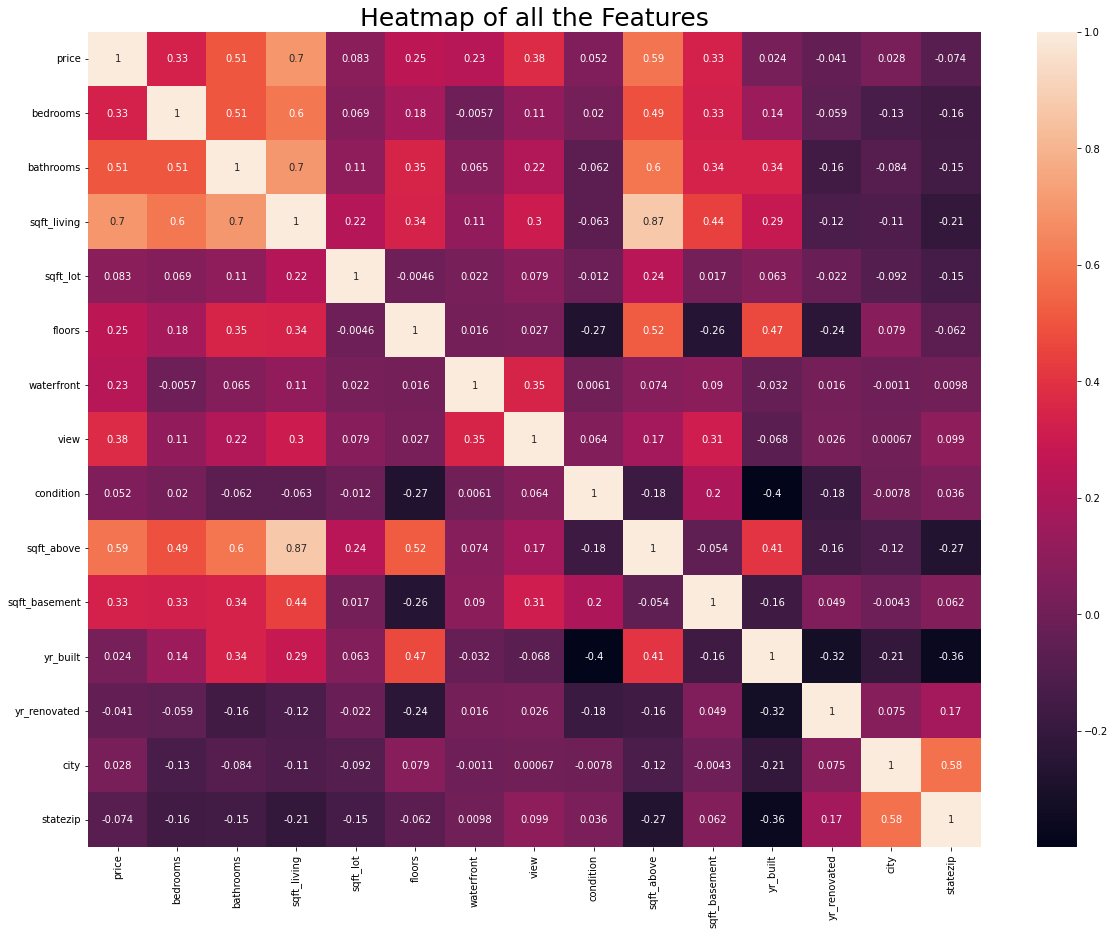

In [212]:
# Correlation Check
feautures = data.drop(['date','street','country'],axis=1)

encoder = LabelEncoder()
feautures['city'] = encoder.fit_transform(feautures['city'])

plt.figure(figsize=(20,15))
sns.heatmap(feautures.corr(), annot=True)
plt.title("Heatmap of all the Features", fontsize = 25);
plt.show()

In [204]:
# Split data to X for variable input, and y for target class
y = feautures['price']
X = feautures.drop(['price','yr_renovated','statezip'],axis=1)

In [205]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Linear Regression

accuracy of determination training  0.5884901780279328
accuracy of determination testing  0.5679441194659824

coefficient
[-5.75651413e+04  4.12781534e+04  1.88643352e+02 -8.47225361e-01
  5.70869618e+04  5.08897975e+05  5.58557116e+04  3.06288747e+04
  1.05962754e+02  8.26805985e+01 -2.40535528e+03  1.39033882e+03]

intercept
4547772.058389398

Prediction price of house 1 : $ 609734.0151209747
Prediction price of house 2 : $ 398321.8529335554
Prediction price of house 3 : $ 508653.6404682193
Prediction price of house 4 : $ 458230.50385743566
Prediction price of house 5 : $ 546584.1349297231
Prediction price of house 6 : $ 738016.140986064
Prediction price of house 7 : $ 195938.0913144881
Prediction price of house 8 : $ 308348.1591394264
Prediction price of house 9 : $ 469812.2906078389
Prediction price of house 10 : $ 639891.6794431955

Real price of house 1 : $ 499431.0
Real price of house 2 : $ 420000.0
Real price of house 3 : $ 568000.0
Real price of house 4 : $ 699900.0
Real price

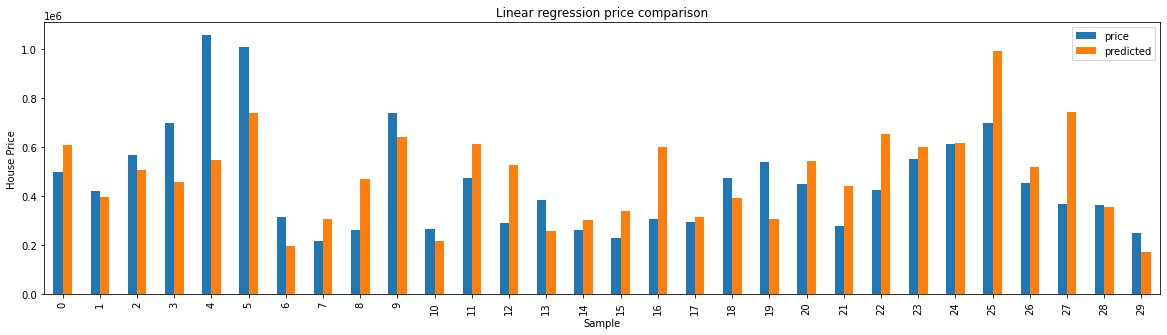

In [206]:
reg = LinearRegression()
reg.fit(X_train, y_train)

reg_train_acc = reg.score(X_train, y_train)
reg_test_acc = reg.score(X_test, y_test)
print('accuracy of determination training ', reg.score(X_train, y_train))
print('accuracy of determination testing ', reg.score(X_test, y_test))
print()
print('coefficient')
print(reg.coef_)
print()
print('intercept')
print(reg.intercept_)
print()
reg_pred = list(reg.predict(X_test))
for i in reg_pred[0:10]:
  print('Prediction price of house', reg_pred.index(i)+1, ': $', i)
print()
for i in list(y_test[0:10]):
  print('Real price of house', list(y_test).index(i)+1, ': $', i)
print()
reg_mae = reg.predict(X_train)
print('Mean Absolute Error: ',mean_absolute_error(y_train, reg_mae))
reg_mse = mean_squared_error(y_test,reg_pred)
print('Root Mean Square Error : ', np.sqrt(mse))

# Visualise
reg_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
reg_pred_price = pd.DataFrame(reg_pred[:30], columns = ['predicted'])
reg_result = pd.concat([reg_real_price, reg_pred_price], axis=1) 
reg_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (20, 5)
plt.title("Linear regression price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

Decision Tree

accuracy of determination training  0.9943463072973916
accuracy of determination testing  0.3248063445337448

prediction
Prediction price of house 1 : $ 568758.5
Prediction price of house 2 : $ 555875.0
Prediction price of house 3 : $ 453882.9487179487
Prediction price of house 4 : $ 689000.0
Prediction price of house 5 : $ 949880.0
Prediction price of house 6 : $ 1050000.0
Prediction price of house 7 : $ 246579.6875
Prediction price of house 8 : $ 243375.0
Prediction price of house 9 : $ 213000.0
Prediction price of house 10 : $ 789500.0

Real price of house 1 : $ 499431.0
Real price of house 2 : $ 420000.0
Real price of house 3 : $ 568000.0
Real price of house 4 : $ 699900.0
Real price of house 5 : $ 1058000.0
Real price of house 6 : $ 1010000.0
Real price of house 7 : $ 315000.0
Real price of house 8 : $ 218000.0
Real price of house 9 : $ 260000.0
Real price of house 10 : $ 739900.0

Mean Absolute Error:  9985.151248780881
Root Mean Square Error :  203113.57162090138


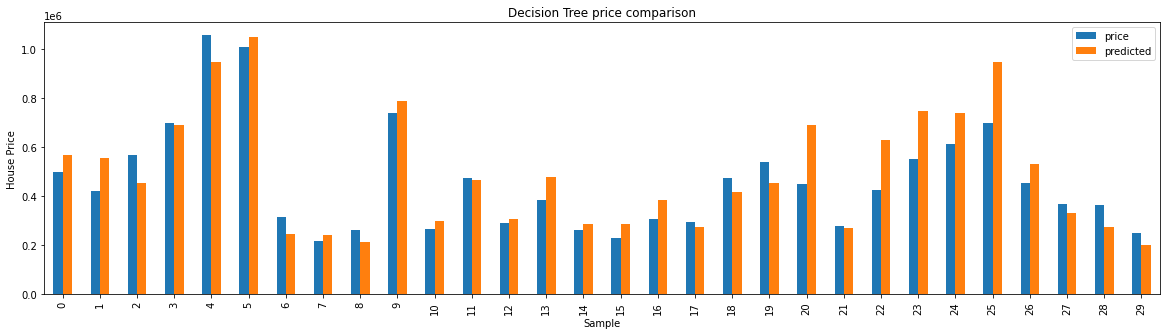

In [207]:
dt = DecisionTreeRegressor(max_depth=18)
dt.fit(X_train, y_train)

dt_train_acc = dt.score(X_train, y_train)
dt_test_acc = dt.score(X_test, y_test)
print('accuracy of determination training ',dt.score(X_train, y_train))
print('accuracy of determination testing ',dt.score(X_test, y_test))
print()
print('prediction')
dt_pred = list(dt.predict(X_test))
for i in dt_pred[0:10]:
  print('Prediction price of house', dt_pred.index(i)+1, ': $', i)
print()
for i in list(y_test[0:10]):
  print('Real price of house', list(y_test).index(i)+1, ': $', i)
print()
dt_mae = dt.predict(X_train)
print('Mean Absolute Error: ', mean_absolute_error(y_train, dt_mae))
dt_mse = mean_squared_error(y_test,dt_pred)
print('Root Mean Square Error : ', np.sqrt(mse))

dt_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
dt_pred_price = pd.DataFrame(dt_pred[:30], columns = ['predicted'])
dt_result = pd.concat([dt_real_price, dt_pred_price], axis=1) 
dt_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (30, 5)
plt.title("Decision Tree price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

Random Forest

accuracy of determination training  0.9399852015490595
accuracy of determination testing  0.6534610416931684

prediction
Prediction price of house 1 : $ 573707.93
Prediction price of house 2 : $ 487649.17130000005
Prediction price of house 3 : $ 552676.175
Prediction price of house 4 : $ 623945.3332999999
Prediction price of house 5 : $ 814738.4
Prediction price of house 6 : $ 750932.9532999999
Prediction price of house 7 : $ 351704.125
Prediction price of house 8 : $ 225571.33329999997
Prediction price of house 9 : $ 265437.1954999999
Prediction price of house 10 : $ 642507.51

Real price of house 1 : $ 499431.0
Real price of house 2 : $ 420000.0
Real price of house 3 : $ 568000.0
Real price of house 4 : $ 699900.0
Real price of house 5 : $ 1058000.0
Real price of house 6 : $ 1010000.0
Real price of house 7 : $ 315000.0
Real price of house 8 : $ 218000.0
Real price of house 9 : $ 260000.0
Real price of house 10 : $ 739900.0

Mean Absolute Error:  47989.22521546122
Root Mean Square Err

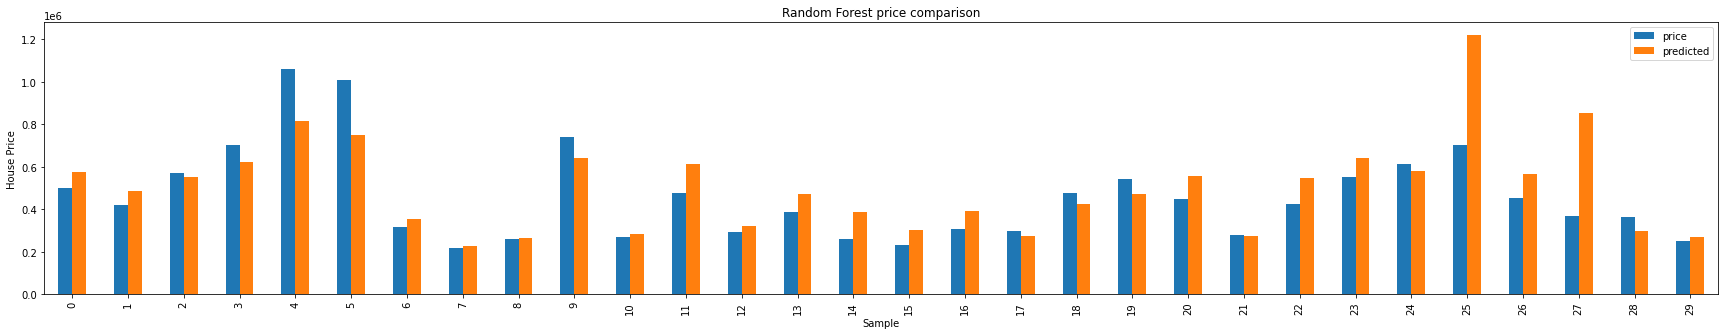

In [208]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

rf_train_acc = rf.score(X_train, y_train)
rf_test_acc = rf.score(X_test, y_test)
print('accuracy of determination training ',rf.score(X_train, y_train))
print('accuracy of determination testing ',rf.score(X_test, y_test))
print()
print('prediction')
rf_pred = list(rf.predict(X_test))
for i in rf_pred[0:10]:
  print('Prediction price of house', rf_pred.index(i)+1, ': $', i)
print()
for i in list(y_test[0:10]):
  print('Real price of house', list(y_test).index(i)+1, ': $', i)
print()
rf_mae = rf.predict(X_train)
print('Mean Absolute Error: ', mean_absolute_error(y_train, rf_mae))

rf_mse = mean_squared_error(y_test,rf_pred)
print('Root Mean Square Error : ', np.sqrt(mse))


rf_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
rf_pred_price = pd.DataFrame(rf_pred[:30], columns = ['predicted'])
rf_result = pd.concat([rf_real_price, rf_pred_price], axis=1) 
rf_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (20, 5)
plt.title("Random Forest price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

In [213]:
import pandas as pd
df = pd.DataFrame({'Models': ['Linear Regression', 'Decision Tree', 'Random Forest'],
                   'training accuracy': [reg_train_acc, dt_train_acc, rf_train_acc],
                   'Test accuray': [reg_test_acc, dt_test_acc, rf_test_acc],
                   'MAE': [reg_mae, dt_mae, rf_mae],
                   'MSE': [reg_mse, dt_mse, rf_mse]})

In [210]:
df.head(5)

,Models,training accuracy,Test accuray,MAE,MSE
0,Linear Regression,0.588490,0.567944,"[398191.1383242849, 411919.06414618343, 468970...",5.088540e+10
1,Decision Tree,0.994346,0.324806,"[229500.0, 304516.6666666667, 449625.0, 220000...",7.952097e+10
2,Random Forest,0.939985,0.653461,"[250578.64, 305675.7188, 459140.44, 284902.15,...",4.081364e+10


Code for local machine

In [ ]:
# -*- coding: utf-8 -*-
"""Untitled14.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1vB0L-A_8TLJEIUat6KgnAQca6gzNXJlP
"""
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#from sklearn.metrics import sensitivity_specificity_support
#from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
data = pd.read_csv('./data.csv')
# Data spread by Price

# Round value of bedrooms, bathrooms and price
data['bedrooms'] = data['bedrooms'].round().astype(int)
data['bathrooms'] = data['bathrooms'].round().astype(int)
data['price'] = data['price'].round(decimals=2)
# Change statezip data type to int
data['statezip'] = data['statezip'].replace("WA 9", "9",regex=True).astype(int)

# Houses where price is 0
data.loc[(data['price'] == 0)]

# Houses with 0 bedrooms
data.loc[(data['bedrooms'] == 0)]

# Houses with 0 bathroom
data.loc[(data['bathrooms'] == 0)].sort_values(by=['price'])

# Check the outliers (most expensive)
data.sort_values(by=['price'],ascending=False)

# Check the outliers (cheapest)
data.loc[(data['price'] > 0)].sort_values(by=['price'])

# Check the outliers (widest sqft_living)
data.sort_values(by=['sqft_living'],ascending=False)

# Check the outliers (widest sqft_living)
data.sort_values(by=['sqft_lot'],ascending=False)

# Create dataframe of missing datapoint by appending price = 0 and bedrooms = 0
#missing = data.loc[(data['price'] == 0)].concat(data.loc[(data['bathrooms'] == 0)])

missing = pd.concat([data.loc[(data['price'] == 0)], data.loc[(data['bathrooms'] == 0)] ])
# Create list that contains index of error datapoint
missing_index_list = missing.reset_index()['index'].to_list()
# Insert index of outliers
missing_index_list.extend([122,1078,2480,4346,4350,4351])
# Sort the list so it won't change the index
missing_index_list.sort(reverse = True)

# Drop error datapoint
data = data.drop(missing_index_list,axis=0)

# Correlation Check
feautures = data.drop(['date','street','country'],axis=1)

encoder = LabelEncoder()
feautures['city'] = encoder.fit_transform(feautures['city'])

# Split data to X for variable input, and y for target class
y = feautures['price']
X = feautures.drop(['price','yr_renovated','statezip'],axis=1)

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)

reg_train_acc = reg.score(X_train, y_train)
reg_test_acc = reg.score(X_test, y_test)
reg_pred = list(reg.predict(X_test))
reg_mae = reg.predict(X_train)
reg_mse = mean_squared_error(y_test,reg_pred)
 
#Decision Tree
dt = DecisionTreeRegressor(max_depth=18)
dt.fit(X_train, y_train)

dt_train_acc = dt.score(X_train, y_train)
dt_test_acc = dt.score(X_test, y_test)
dt_pred = list(dt.predict(X_test))
dt_mae = dt.predict(X_train)
dt_mse = mean_squared_error(y_test,dt_pred)

#Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

rf_train_acc = rf.score(X_train, y_train)
rf_test_acc = rf.score(X_test, y_test)
rf_pred = list(rf.predict(X_test))
rf_mae = rf.predict(X_train)
rf_mse = mean_squared_error(y_test,rf_pred)

result = pd.DataFrame({'Models': ['Linear Regression', 'Decision Tree', 'Random Forest'],
                   'training accuracy': [reg_train_acc, dt_train_acc, rf_train_acc],
                   'Test accuray': [reg_test_acc, dt_test_acc, rf_test_acc],
                   'MAE': [reg_mae, dt_mae, rf_mae],
                   'MSE': [reg_mse, dt_mse, rf_mse]})

print(result)